# Project 3, Part 1
*  **Nicholas Giuffrida**

In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import holidays
import datetime as dt
import seaborn as sns
from holidays import country_holidays
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
sns.set_context("talk", font_scale=0.9)

In [2]:
crime_files = sorted(glob.glob("Data/Chicago-Crime_*.csv"))
crime_files


['Data/Chicago-Crime_2001.csv',
 'Data/Chicago-Crime_2002.csv',
 'Data/Chicago-Crime_2003.csv',
 'Data/Chicago-Crime_2004.csv',
 'Data/Chicago-Crime_2005.csv',
 'Data/Chicago-Crime_2006.csv',
 'Data/Chicago-Crime_2007.csv',
 'Data/Chicago-Crime_2008.csv',
 'Data/Chicago-Crime_2009.csv',
 'Data/Chicago-Crime_2010.csv',
 'Data/Chicago-Crime_2011.csv',
 'Data/Chicago-Crime_2012.csv',
 'Data/Chicago-Crime_2013.csv',
 'Data/Chicago-Crime_2014.csv',
 'Data/Chicago-Crime_2015.csv',
 'Data/Chicago-Crime_2016.csv',
 'Data/Chicago-Crime_2017.csv',
 'Data/Chicago-Crime_2018.csv',
 'Data/Chicago-Crime_2019.csv',
 'Data/Chicago-Crime_2020.csv',
 'Data/Chicago-Crime_2021.csv',
 'Data/Chicago-Crime_2022.csv']

In [3]:
# Use read_csv in a list comprehension and combine with concat to load all files
df = pd.concat([pd.read_csv(f) for f in crime_files] )
df.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020


In [4]:
df.columns

Index(['ID', 'Date', 'Primary Type', 'Description', 'Location Description',
       'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Latitude',
       'Longitude'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7713109 entries, 0 to 238857
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(4), int64(2), object(4)
memory usage: 662.0+ MB


In [6]:
df.isna().sum()

ID                           0
Date                         0
Primary Type                 0
Description                  0
Location Description     10928
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614846
Latitude                 88685
Longitude                88685
dtype: int64

In [7]:
df = df.dropna(subset=["District"])

In [8]:
df['District'] = df['District'].astype(int)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7713062 entries, 0 to 238857
Data columns (total 12 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Date                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              int64  
 9   Ward                  float64
 10  Latitude              float64
 11  Longitude             float64
dtypes: bool(2), float64(3), int64(3), object(4)
memory usage: 662.0+ MB


In [10]:
now = dt.datetime.now()
now

datetime.datetime(2023, 10, 24, 10, 44, 17, 84393)

In [11]:
fmt = "%m/%d/%Y %I:%M:%S %p"
now.strftime(fmt)

'10/24/2023 10:44:17 AM'

In [12]:
df['Date'] = pd.to_datetime(df['Date'], format = fmt)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7713062 entries, 0 to 238857
Data columns (total 12 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Date                  datetime64[ns]
 2   Primary Type          object        
 3   Description           object        
 4   Location Description  object        
 5   Arrest                bool          
 6   Domestic              bool          
 7   Beat                  int64         
 8   District              int64         
 9   Ward                  float64       
 10  Latitude              float64       
 11  Longitude             float64       
dtypes: bool(2), datetime64[ns](1), float64(3), int64(3), object(3)
memory usage: 662.0+ MB


In [13]:
melted = pd.melt(df.drop(columns=['Latitude','Longitude','Ward','Arrest','Beat', 
                                  'Description', 'Location Description', 'Domestic']),
                 id_vars=['Date', 'Primary Type', 
                             'District'], 
                 value_name="keyword operator from-rainbow">='Date',var_name="Crime")
melted

,Date,Primary Type,District,Crime,True
0,2001-01-01 01:00:00,BATTERY,16,ID,1326041
1,2001-01-01 13:00:00,BATTERY,8,ID,1319931
2,2001-01-01 13:00:00,GAMBLING,3,ID,1324743
3,2001-01-01 01:00:00,CRIMINAL DAMAGE,24,ID,1310717
4,2001-01-01 01:00:00,BATTERY,2,ID,1318099
...,...,...,...,...,...
7713057,2022-12-31 12:50:00,ASSAULT,10,ID,12938029
7713058,2022-12-31 12:50:00,ASSAULT,7,ID,12937822
7713059,2022-12-31 00:52:00,BATTERY,11,ID,12937583
7713060,2022-12-31 12:52:00,ASSAULT,14,ID,12938420


In [14]:
melted = melted.set_index("Date")
melted = melted.sort_index()
melted.head(3)

,Primary Type,District,Crime,True
Date,,,,
2001-01-01,SEX OFFENSE,10,ID,9754953
2001-01-01,CRIM SEXUAL ASSAULT,2,ID,3994567
2001-01-01,THEFT,8,ID,1927872


## Topic 1) Comparing Police Districts
*  Which district had the most crimes in 2022?
* Which had the least?

In [15]:
crimes_by_dist = melted.groupby('Date')['District'].value_counts().sort_index()
crimes_by_dist

Date                 District
2001-01-01 00:00:00  1            2
                     2            8
                     3            3
                     4            6
                     5           10
                                 ..
2022-12-31 23:45:00  22           1
2022-12-31 23:47:00  22           2
2022-12-31 23:50:00  15           1
                     24           1
2022-12-31 23:55:00  15           1
Name: District, Length: 6572846, dtype: int64

In [16]:
plot_crime = crimes_by_dist.to_frame('Crimes').reset_index()
plot_crime

,Date,District,Crimes
0,2001-01-01 00:00:00,1,2
1,2001-01-01 00:00:00,2,8
2,2001-01-01 00:00:00,3,3
3,2001-01-01 00:00:00,4,6
4,2001-01-01 00:00:00,5,10
...,...,...,...
6572841,2022-12-31 23:45:00,22,1
6572842,2022-12-31 23:47:00,22,2
6572843,2022-12-31 23:50:00,15,1
6572844,2022-12-31 23:50:00,24,1


In [17]:
plot_crime = plot_crime.drop(plot_crime[plot_crime['Crimes']==0].index)
plot_crime.head()


,Date,District,Crimes
0,2001-01-01,1,2
1,2001-01-01,2,8
2,2001-01-01,3,3
3,2001-01-01,4,6
4,2001-01-01,5,10


In [18]:
plot_crime.dtypes

Date        datetime64[ns]
District             int64
Crimes               int64
dtype: object

In [19]:
plot_crime.value_counts()

Date                 District  Crimes
2001-01-01 00:00:00  1         2         1
2013-04-29 10:00:00  11        3         1
2013-04-29 10:20:00  5         1         1
2013-04-29 10:18:00  8         1         1
2013-04-29 10:15:00  6         1         1
                                        ..
2006-07-27 18:55:13  5         1         1
2006-07-27 18:55:00  16        1         1
                     3         1         1
2006-07-27 18:53:45  7         1         1
2022-12-31 23:55:00  15        1         1
Length: 6572846, dtype: int64

In [20]:
plot_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6572846 entries, 0 to 6572845
Data columns (total 3 columns):
 #   Column    Dtype         
---  ------    -----         
 0   Date      datetime64[ns]
 1   District  int64         
 2   Crimes    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 150.4 MB


###  Total Aproach
*  We can simply check the total number of crimes reported by district.

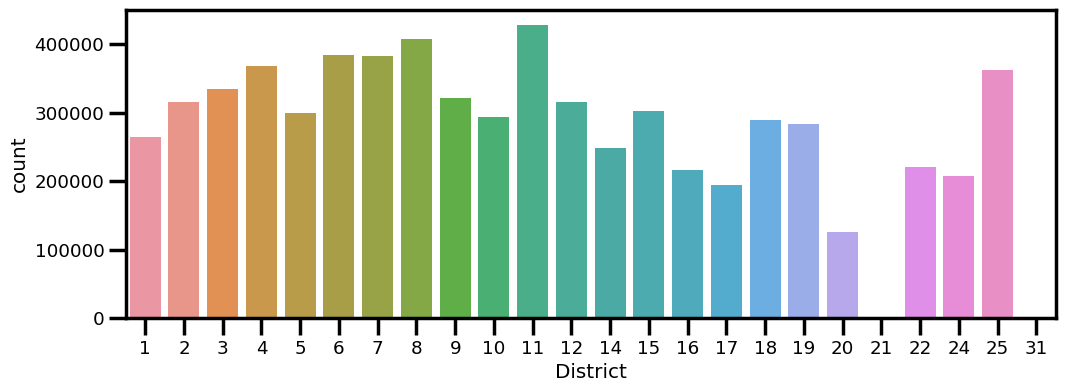

In [21]:
sns.set_context("poster", font_scale=0.6)
ax = sns.countplot(data=plot_crime, x='District')

###  Total Aproach answer:
*  The most crimes were reported in Districts 11 and 8 .
*  The fewest were in Districts 21, and 31

In [22]:
crime_perc_by_dist = plot_crime.groupby('District')['Crimes'].value_counts(normalize=True).sort_index()
crime_perc_by_dist

District  Crimes
1         1         0.867603
          2         0.102452
          3         0.022269
          4         0.005405
          5         0.001451
                      ...   
25        25        0.000006
          30        0.000003
          32        0.000003
          47        0.000003
31        1         1.000000
Name: Crimes, Length: 378, dtype: float64

In [23]:
plot_df_perc = crime_perc_by_dist.to_frame('Crime Perc').reset_index()
plot_df_perc

,District,Crimes,Crime Perc
0,1,1,0.867603
1,1,2,0.102452
2,1,3,0.022269
3,1,4,0.005405
4,1,5,0.001451
...,...,...,...
373,25,25,0.000006
374,25,30,0.000003
375,25,32,0.000003
376,25,47,0.000003


In [24]:
plot_df_perc.describe()

,District,Crimes,Crime Perc
count,378.000000,378.000000,378.000000
mean,11.814815,10.246032,0.063492
std,7.271367,7.655396,0.215050
min,1.000000,1.000000,0.000002
25%,6.000000,5.000000,0.000007
50%,10.500000,9.000000,0.000033
75%,17.000000,14.000000,0.001644
max,31.000000,58.000000,1.000000


###  Normalized Approach
*  View the totals as a portion of the total reported.

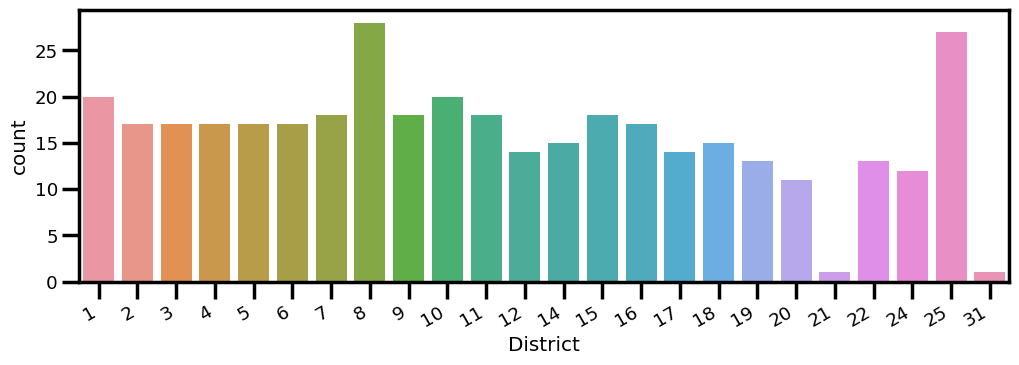

In [25]:
ax = sns.countplot(data=plot_df_perc, x='District')
fig = ax.get_figure()
fig.autofmt_xdate()

###  Normalized Aproach answer
*  We can see that While 21 and 31 still represent the low end of the spectrum :

 - District 11 has dropped to the middle of the pack, and
  - Disrict 25 has become the new entry into the *Most Crimes* category.

##  Topic 4) Comparing Months
1. What months have the most crime? What months have the least?
1. Are there any individual crimes that do not follow this pattern? If so, which crimes?

In [26]:
# Engineering features by date time
melted['Month']  = melted.index.month
melted['Month'] = melted['Month']

In [27]:
melted['Month'].value_counts()

7     717230
8     710440
5     682931
6     681738
10    676261
9     668236
3     629704
4     627175
11    608954
1     601235
12    579767
2     529391
Name: Month, dtype: int64

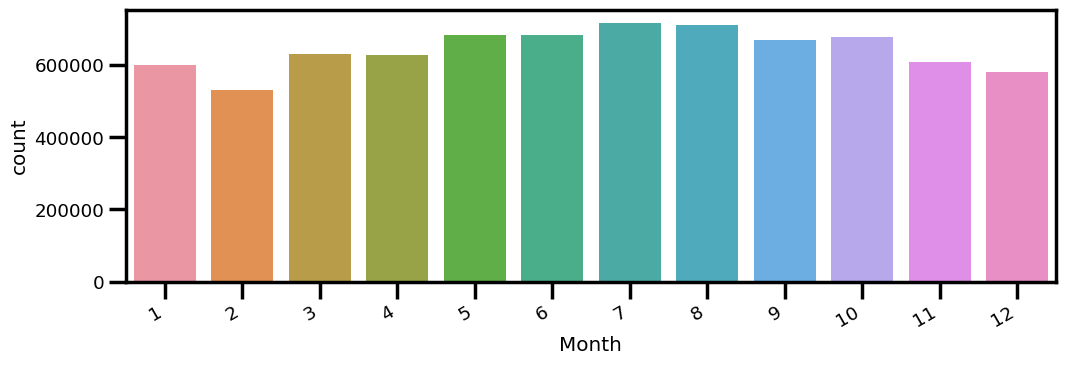

In [28]:
ax = sns.countplot(data=melted, x=('Month'))
fig = ax.get_figure()
fig.autofmt_xdate()

###  Topic 2 Part 1 answer
-  January and February  had the fewest Crimes, While July and August had the most

 -  Let's Break that down to see if certain crimes do not follow the same trend.

In [29]:
crimes_by_month = melted.groupby('Primary Type')['Month'].value_counts().sort_index()
crimes_by_month

Primary Type       Month
ARSON              1         917
                   2         807
                   3        1111
                   4        1097
                   5        1230
                            ... 
WEAPONS VIOLATION  8        9887
                   9        9435
                   10       9188
                   11       7952
                   12       7401
Name: Month, Length: 415, dtype: int64

In [30]:
# convert to dataframe 
plot_df = crimes_by_month.to_frame('Crimes').reset_index()
plot_df

,Primary Type,Month,Crimes
0,ARSON,1,917
1,ARSON,2,807
2,ARSON,3,1111
3,ARSON,4,1097
4,ARSON,5,1230
...,...,...,...
410,WEAPONS VIOLATION,8,9887
411,WEAPONS VIOLATION,9,9435
412,WEAPONS VIOLATION,10,9188
413,WEAPONS VIOLATION,11,7952


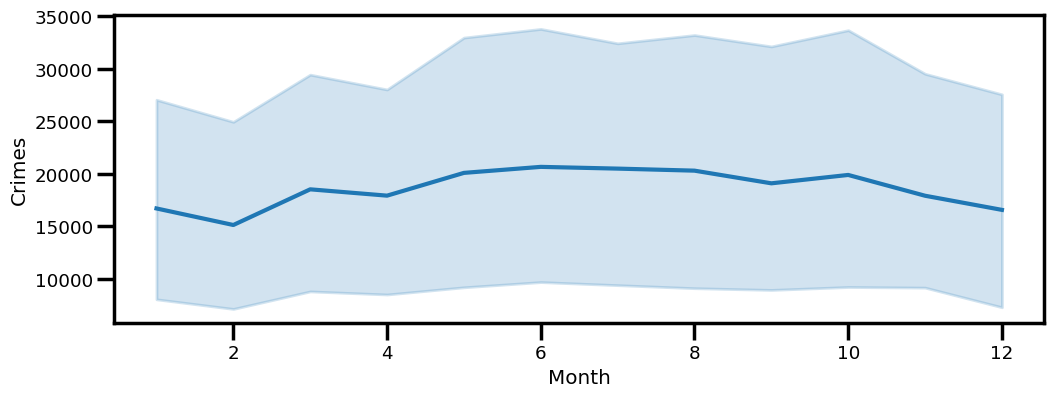

In [31]:
ax = sns.lineplot(data=plot_df, x='Month',y='Crimes')

*  Here we can see that the overall crime trend within the city can fluctuate greatly depending on the actual Solar Season.

 - Crime up when Temps up.  

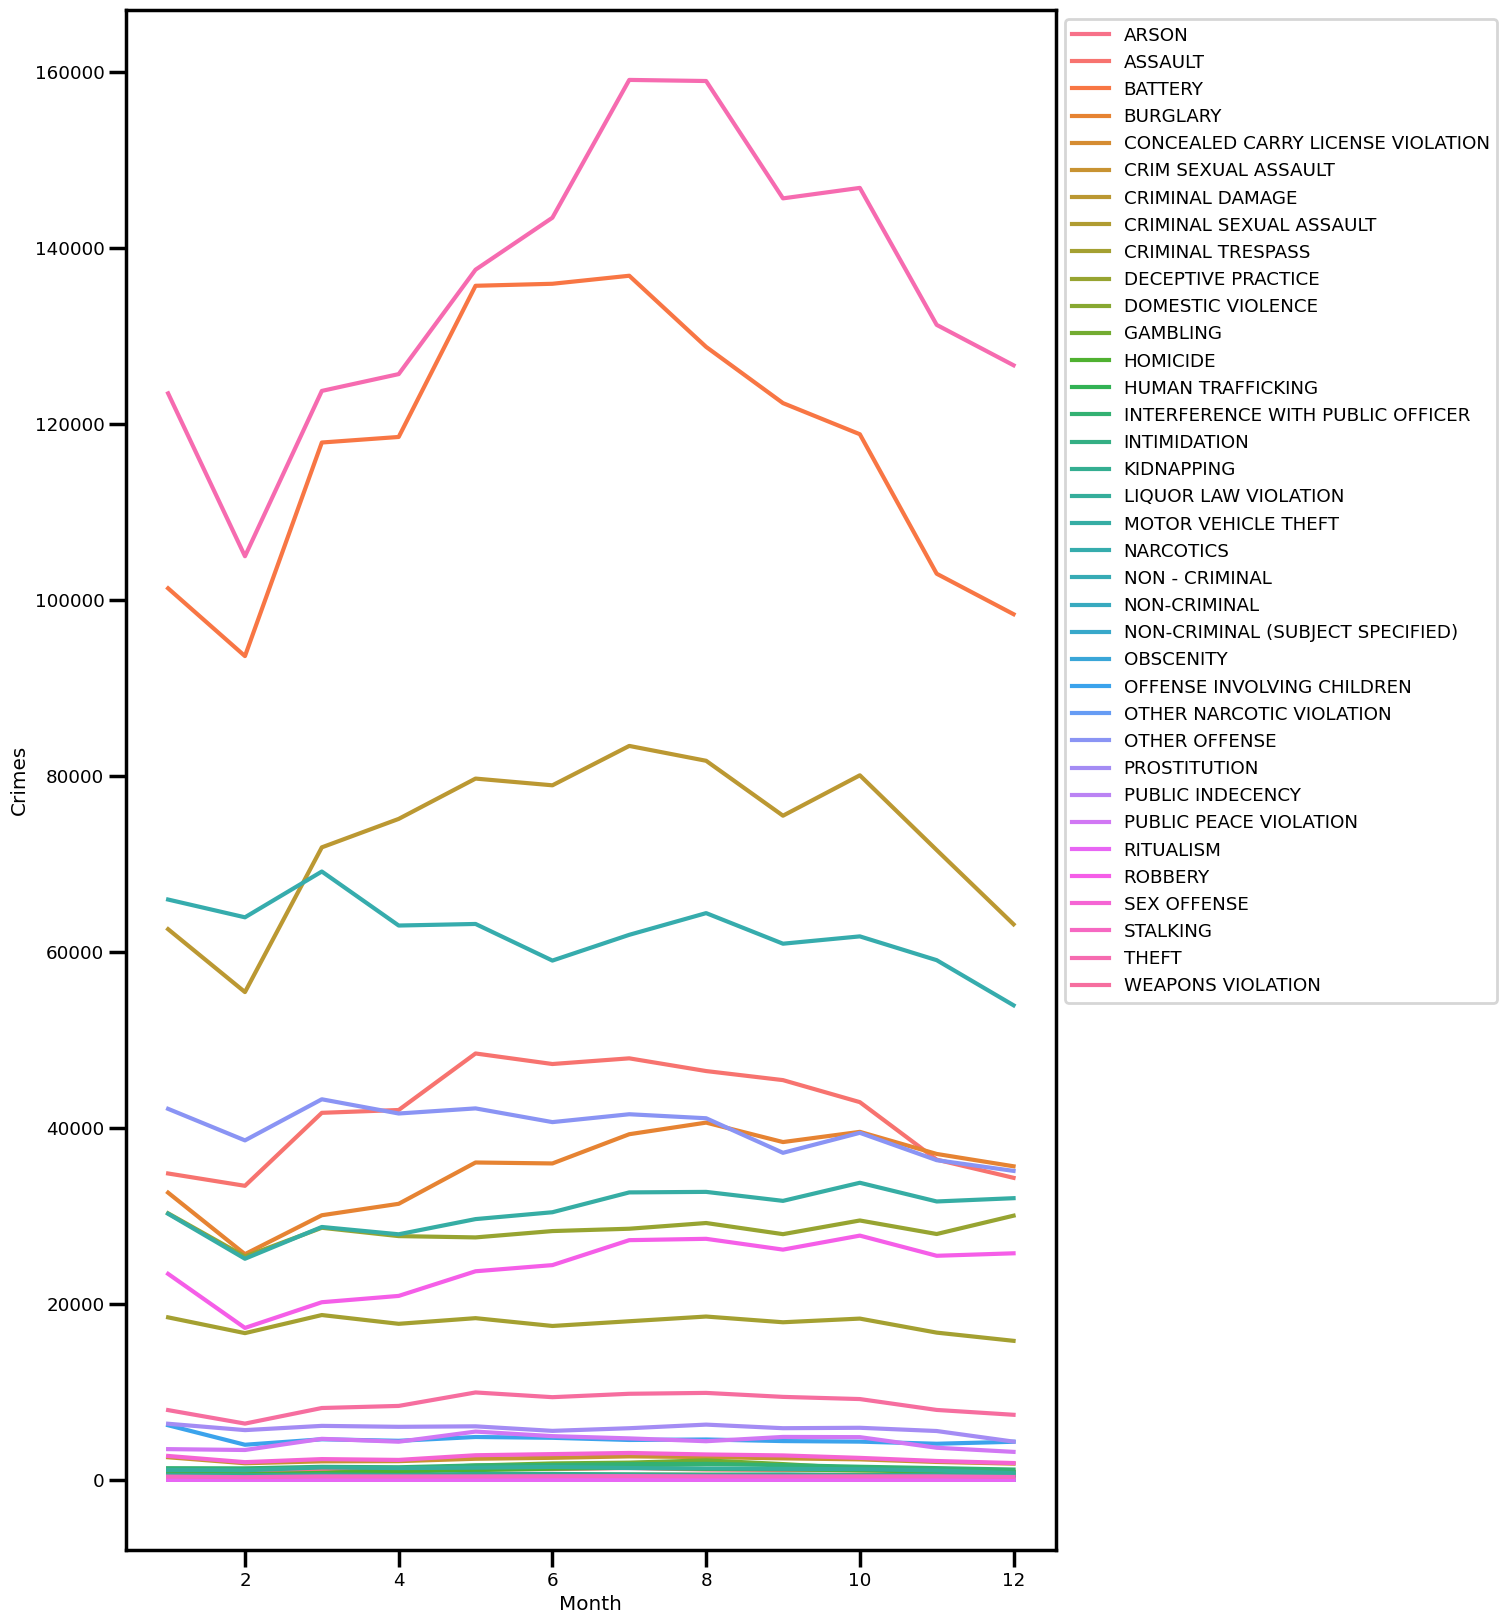

In [32]:
fig, ax = plt.subplots(figsize=(12,20))
sns.lineplot(data=plot_df, x='Month',y='Crimes',markers=True,
                  hue='Primary Type',ax=ax,)
ax.legend(bbox_to_anchor=[1,1]);

###  Captain Chicago
 *  It seems Obvious that we are working for a super hero.
 * He Is going to single handedly put a dent in Crime in Chicago
 * He needs to know What Time of year to focus his efforts on Which Types of Crimes.
 * He is certainly NOT Dan Akroyd(probably).

In [33]:
plot_df['Primary Type'].value_counts()

ARSON                                12
LIQUOR LAW VIOLATION                 12
THEFT                                12
STALKING                             12
SEX OFFENSE                          12
ROBBERY                              12
PUBLIC PEACE VIOLATION               12
PUBLIC INDECENCY                     12
PROSTITUTION                         12
OTHER OFFENSE                        12
OTHER NARCOTIC VIOLATION             12
OFFENSE INVOLVING CHILDREN           12
OBSCENITY                            12
NON-CRIMINAL                         12
NARCOTICS                            12
ASSAULT                              12
MOTOR VEHICLE THEFT                  12
KIDNAPPING                           12
INTIMIDATION                         12
BATTERY                              12
BURGLARY                             12
CONCEALED CARRY LICENSE VIOLATION    12
CRIM SEXUAL ASSAULT                  12
CRIMINAL DAMAGE                      12
CRIMINAL SEXUAL ASSAULT              12


###  Remove Statutory
*  **Captain Chicago** Has no time for Statutory Crime.

 -  That's his motto.
 -  It's not the best motto
 
* We will remove the *statutory crimes* by
 - 1st defining all the values that constitute *Statutory*.
  - then excluding those from our Visualizations

In [34]:
plot_df['Primary Type'] = plot_df['Primary Type'].replace({'CONCEALED CARRY LICENSE VIOLATION':'STATUTORY OFFENSE', 
                                                           "WEAPONS VIOLATION":'STATUTORY OFFENSE',
                                                           'CRIMINAL SEXUAL ASSAULT':'SEX OFFENSE', 
                                                          'PUBLIC INDECENCY':'STATUTORY OFFENSE', 
                                                           'PUBLIC PEACE VIOLATION':'STATUTORY OFFENSE', 
                                                          'LIQUOR LAW VIOLATION':'STATUTORY OFFENSE',
                                                          'PROSTITUTION':'STATUTORY OFFENSE',
                                                          'OTHER NARCOTIC VIOLATION':'STATUTORY OFFENSE', 
                                                          'OBSCENITY':'STATUTORY OFFENSE', 
                                                          'NON-CRIMINAL':'STATUTORY OFFENSE', 
                                                          'NARCOTICS':'STATUTORY OFFENSE', 
                                                          'CRIM SEXUAL ASSAULT':'SEX OFFENSE',
                                                           'GAMBLING':'STATUTORY OFFENSE', 
                                                          'INTERFERENCE WITH PUBLIC OFFICER':'STATUTORY OFFENSE', 
                                                          'RITUALISM':'STATUTORY OFFENSE', 
                                                          'NON - CRIMINAL':'STATUTORY OFFENSE', 
                                                          'NON-CRIMINAL (SUBJECT SPECIFIED)':'STATUTORY OFFENSE'})
plot_df['Primary Type'].value_counts()

STATUTORY OFFENSE             174
SEX OFFENSE                    36
ARSON                          12
HUMAN TRAFFICKING              12
STALKING                       12
ROBBERY                        12
OTHER OFFENSE                  12
OFFENSE INVOLVING CHILDREN     12
MOTOR VEHICLE THEFT            12
KIDNAPPING                     12
INTIMIDATION                   12
HOMICIDE                       12
ASSAULT                        12
DECEPTIVE PRACTICE             12
CRIMINAL TRESPASS              12
CRIMINAL DAMAGE                12
BURGLARY                       12
BATTERY                        12
THEFT                          12
DOMESTIC VIOLENCE               1
Name: Primary Type, dtype: int64

In [35]:
plot_df = plot_df.drop(plot_df[plot_df['Primary Type']=='STATUTORY OFFENSE'].index)
plot_df.head()
plot_df['Primary Type'].value_counts()

SEX OFFENSE                   36
ARSON                         12
HUMAN TRAFFICKING             12
STALKING                      12
ROBBERY                       12
OTHER OFFENSE                 12
OFFENSE INVOLVING CHILDREN    12
MOTOR VEHICLE THEFT           12
KIDNAPPING                    12
INTIMIDATION                  12
HOMICIDE                      12
ASSAULT                       12
DECEPTIVE PRACTICE            12
CRIMINAL TRESPASS             12
CRIMINAL DAMAGE               12
BURGLARY                      12
BATTERY                       12
THEFT                         12
DOMESTIC VIOLENCE              1
Name: Primary Type, dtype: int64

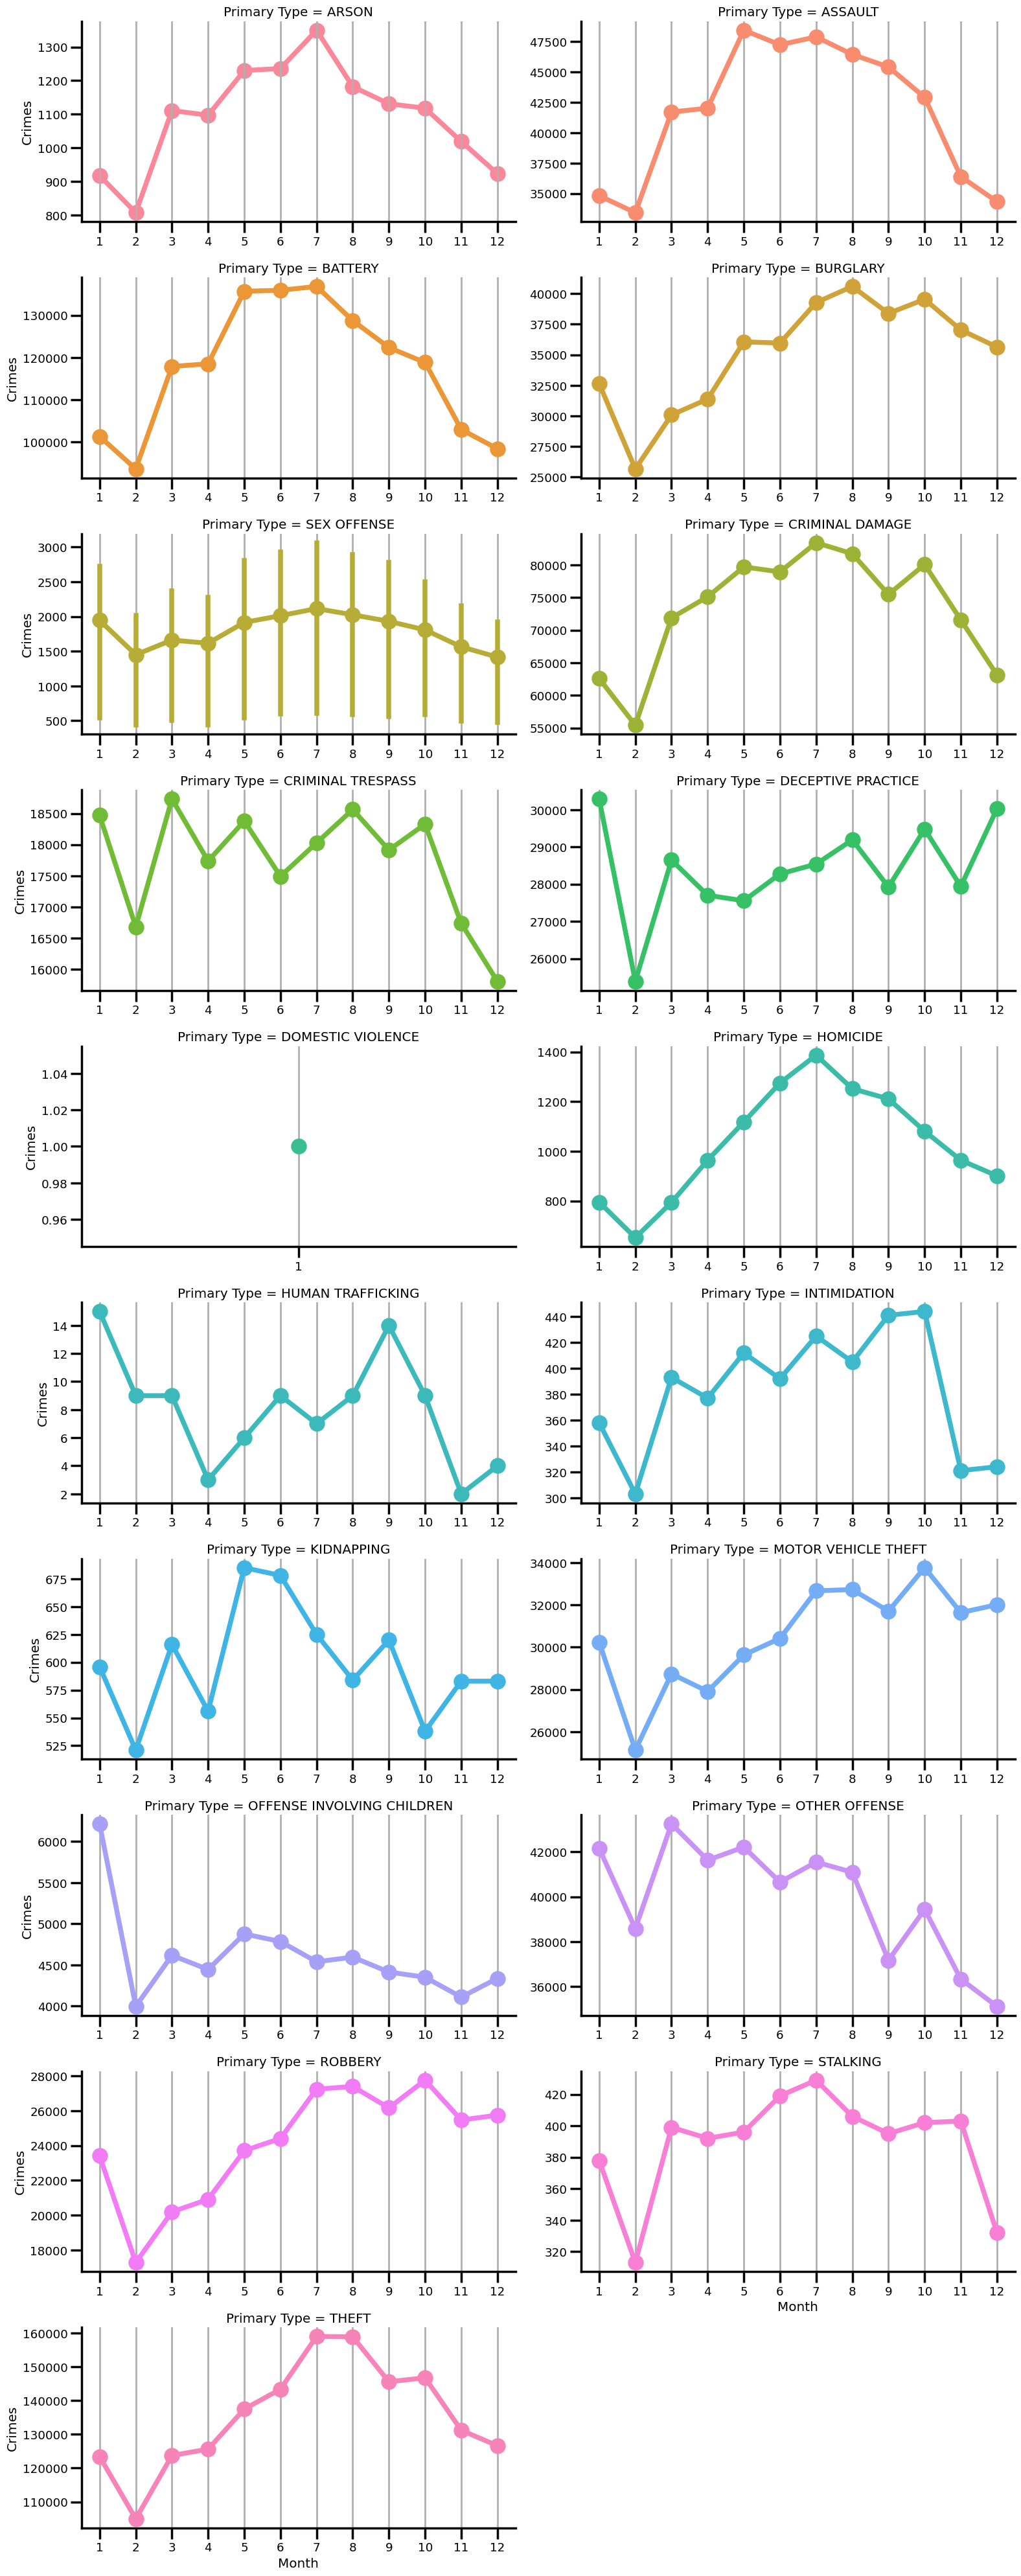

In [36]:
g = sns.catplot(data=plot_df, x='Month', y='Crimes',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

###   Topic 4 part 2 answer
*  The most notable Crime Type that goes against the Overall seasonal trend is the Deceptive Practice, which rises to it's peak around the end of the calender year

 -  We can not rule out that Santa Clause may have something to do with these "Deceptive Practices".
 - Captain Chicago (probably not Dan Akroyd) is on it!

##  Topic 2  Crimes Across the Years:
1. Is the total number of crimes increasing or decreasing across the years?
1.Are there any individual crimes that are doing the opposite?

In [37]:
melted['Year']  = melted.index.year
melted['Year']

Date
2001-01-01 00:00:00    2001
2001-01-01 00:00:00    2001
2001-01-01 00:00:00    2001
2001-01-01 00:00:00    2001
2001-01-01 00:00:00    2001
                       ... 
2022-12-31 23:47:00    2022
2022-12-31 23:47:00    2022
2022-12-31 23:50:00    2022
2022-12-31 23:50:00    2022
2022-12-31 23:55:00    2022
Name: Year, Length: 7713062, dtype: int64

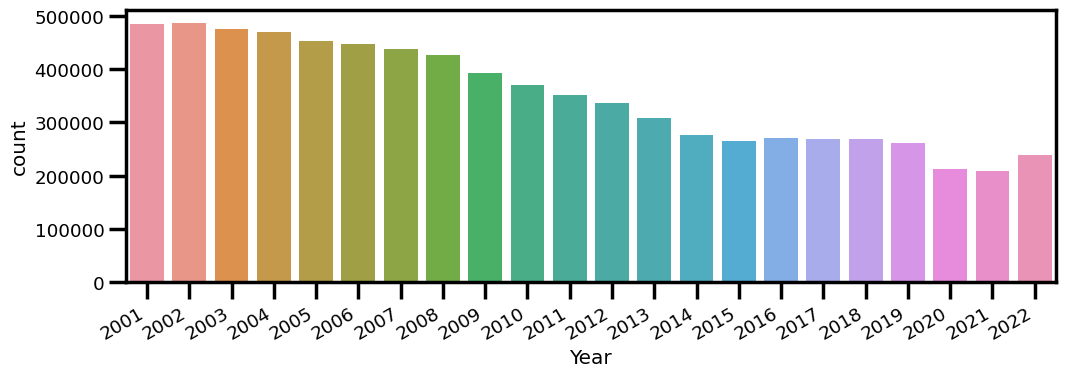

In [38]:
ax = sns.countplot(data=melted, x='Year')
fig = ax.get_figure()
fig.autofmt_xdate()

###  Topic 2 part 1 answer
*  The overall trend is that crime hes been steadily decreasing from 2001- Present.

 -  Let's see if any individual crimes buck that trend.

In [39]:
crimes_by_year = melted.groupby('Primary Type')['Year'].value_counts().sort_index()
crimes_by_year

Primary Type       Year
ARSON              2001    1011
                   2002    1032
                   2003     955
                   2004     778
                   2005     691
                           ... 
WEAPONS VIOLATION  2018    5456
                   2019    6339
                   2020    8432
                   2021    8980
                   2022    8766
Name: Year, Length: 689, dtype: int64

In [40]:
plot_df_y = crimes_by_year.to_frame('Crimes').reset_index()
plot_df_y

,Primary Type,Year,Crimes
0,ARSON,2001,1011
1,ARSON,2002,1032
2,ARSON,2003,955
3,ARSON,2004,778
4,ARSON,2005,691
...,...,...,...
684,WEAPONS VIOLATION,2018,5456
685,WEAPONS VIOLATION,2019,6339
686,WEAPONS VIOLATION,2020,8432
687,WEAPONS VIOLATION,2021,8980


In [41]:
plot_df_y['Primary Type'] = plot_df_y['Primary Type'].replace({'CONCEALED CARRY LICENSE VIOLATION':'STATUTORY OFFENSE', 
                                                           "WEAPONS VIOLATION":'STATUTORY OFFENSE',
                                                           'CRIMINAL SEXUAL ASSAULT':'SEX OFFENSE', 
                                                          'PUBLIC INDECENCY':'STATUTORY OFFENSE', 
                                                           'PUBLIC PEACE VIOLATION':'STATUTORY OFFENSE', 
                                                          'LIQUOR LAW VIOLATION':'STATUTORY OFFENSE',
                                                          'PROSTITUTION':'STATUTORY OFFENSE',
                                                          'OTHER NARCOTIC VIOLATION':'STATUTORY OFFENSE', 
                                                          'OBSCENITY':'STATUTORY OFFENSE', 
                                                          'NON-CRIMINAL':'STATUTORY OFFENSE', 
                                                          'NARCOTICS':'STATUTORY OFFENSE', 
                                                          'CRIM SEXUAL ASSAULT':'SEX OFFENSE',
                                                           'GAMBLING':'STATUTORY OFFENSE', 
                                                          'INTERFERENCE WITH PUBLIC OFFICER':'STATUTORY OFFENSE', 
                                                          'RITUALISM':'STATUTORY OFFENSE', 
                                                          'NON - CRIMINAL':'STATUTORY OFFENSE', 
                                                          'NON-CRIMINAL (SUBJECT SPECIFIED)':'STATUTORY OFFENSE'})
plot_df_y['Primary Type'].value_counts()

STATUTORY OFFENSE             261
SEX OFFENSE                    64
ARSON                          22
INTIMIDATION                   22
STALKING                       22
ROBBERY                        22
OTHER OFFENSE                  22
OFFENSE INVOLVING CHILDREN     22
MOTOR VEHICLE THEFT            22
KIDNAPPING                     22
HOMICIDE                       22
ASSAULT                        22
DECEPTIVE PRACTICE             22
CRIMINAL TRESPASS              22
CRIMINAL DAMAGE                22
BURGLARY                       22
BATTERY                        22
THEFT                          22
HUMAN TRAFFICKING              11
DOMESTIC VIOLENCE               1
Name: Primary Type, dtype: int64

In [42]:
plot_df_y = plot_df_y.drop(plot_df_y[plot_df_y['Primary Type']=='STATUTORY OFFENSE'].index)
plot_df_y['Primary Type'].value_counts()

SEX OFFENSE                   64
ARSON                         22
INTIMIDATION                  22
STALKING                      22
ROBBERY                       22
OTHER OFFENSE                 22
OFFENSE INVOLVING CHILDREN    22
MOTOR VEHICLE THEFT           22
KIDNAPPING                    22
HOMICIDE                      22
ASSAULT                       22
DECEPTIVE PRACTICE            22
CRIMINAL TRESPASS             22
CRIMINAL DAMAGE               22
BURGLARY                      22
BATTERY                       22
THEFT                         22
HUMAN TRAFFICKING             11
DOMESTIC VIOLENCE              1
Name: Primary Type, dtype: int64

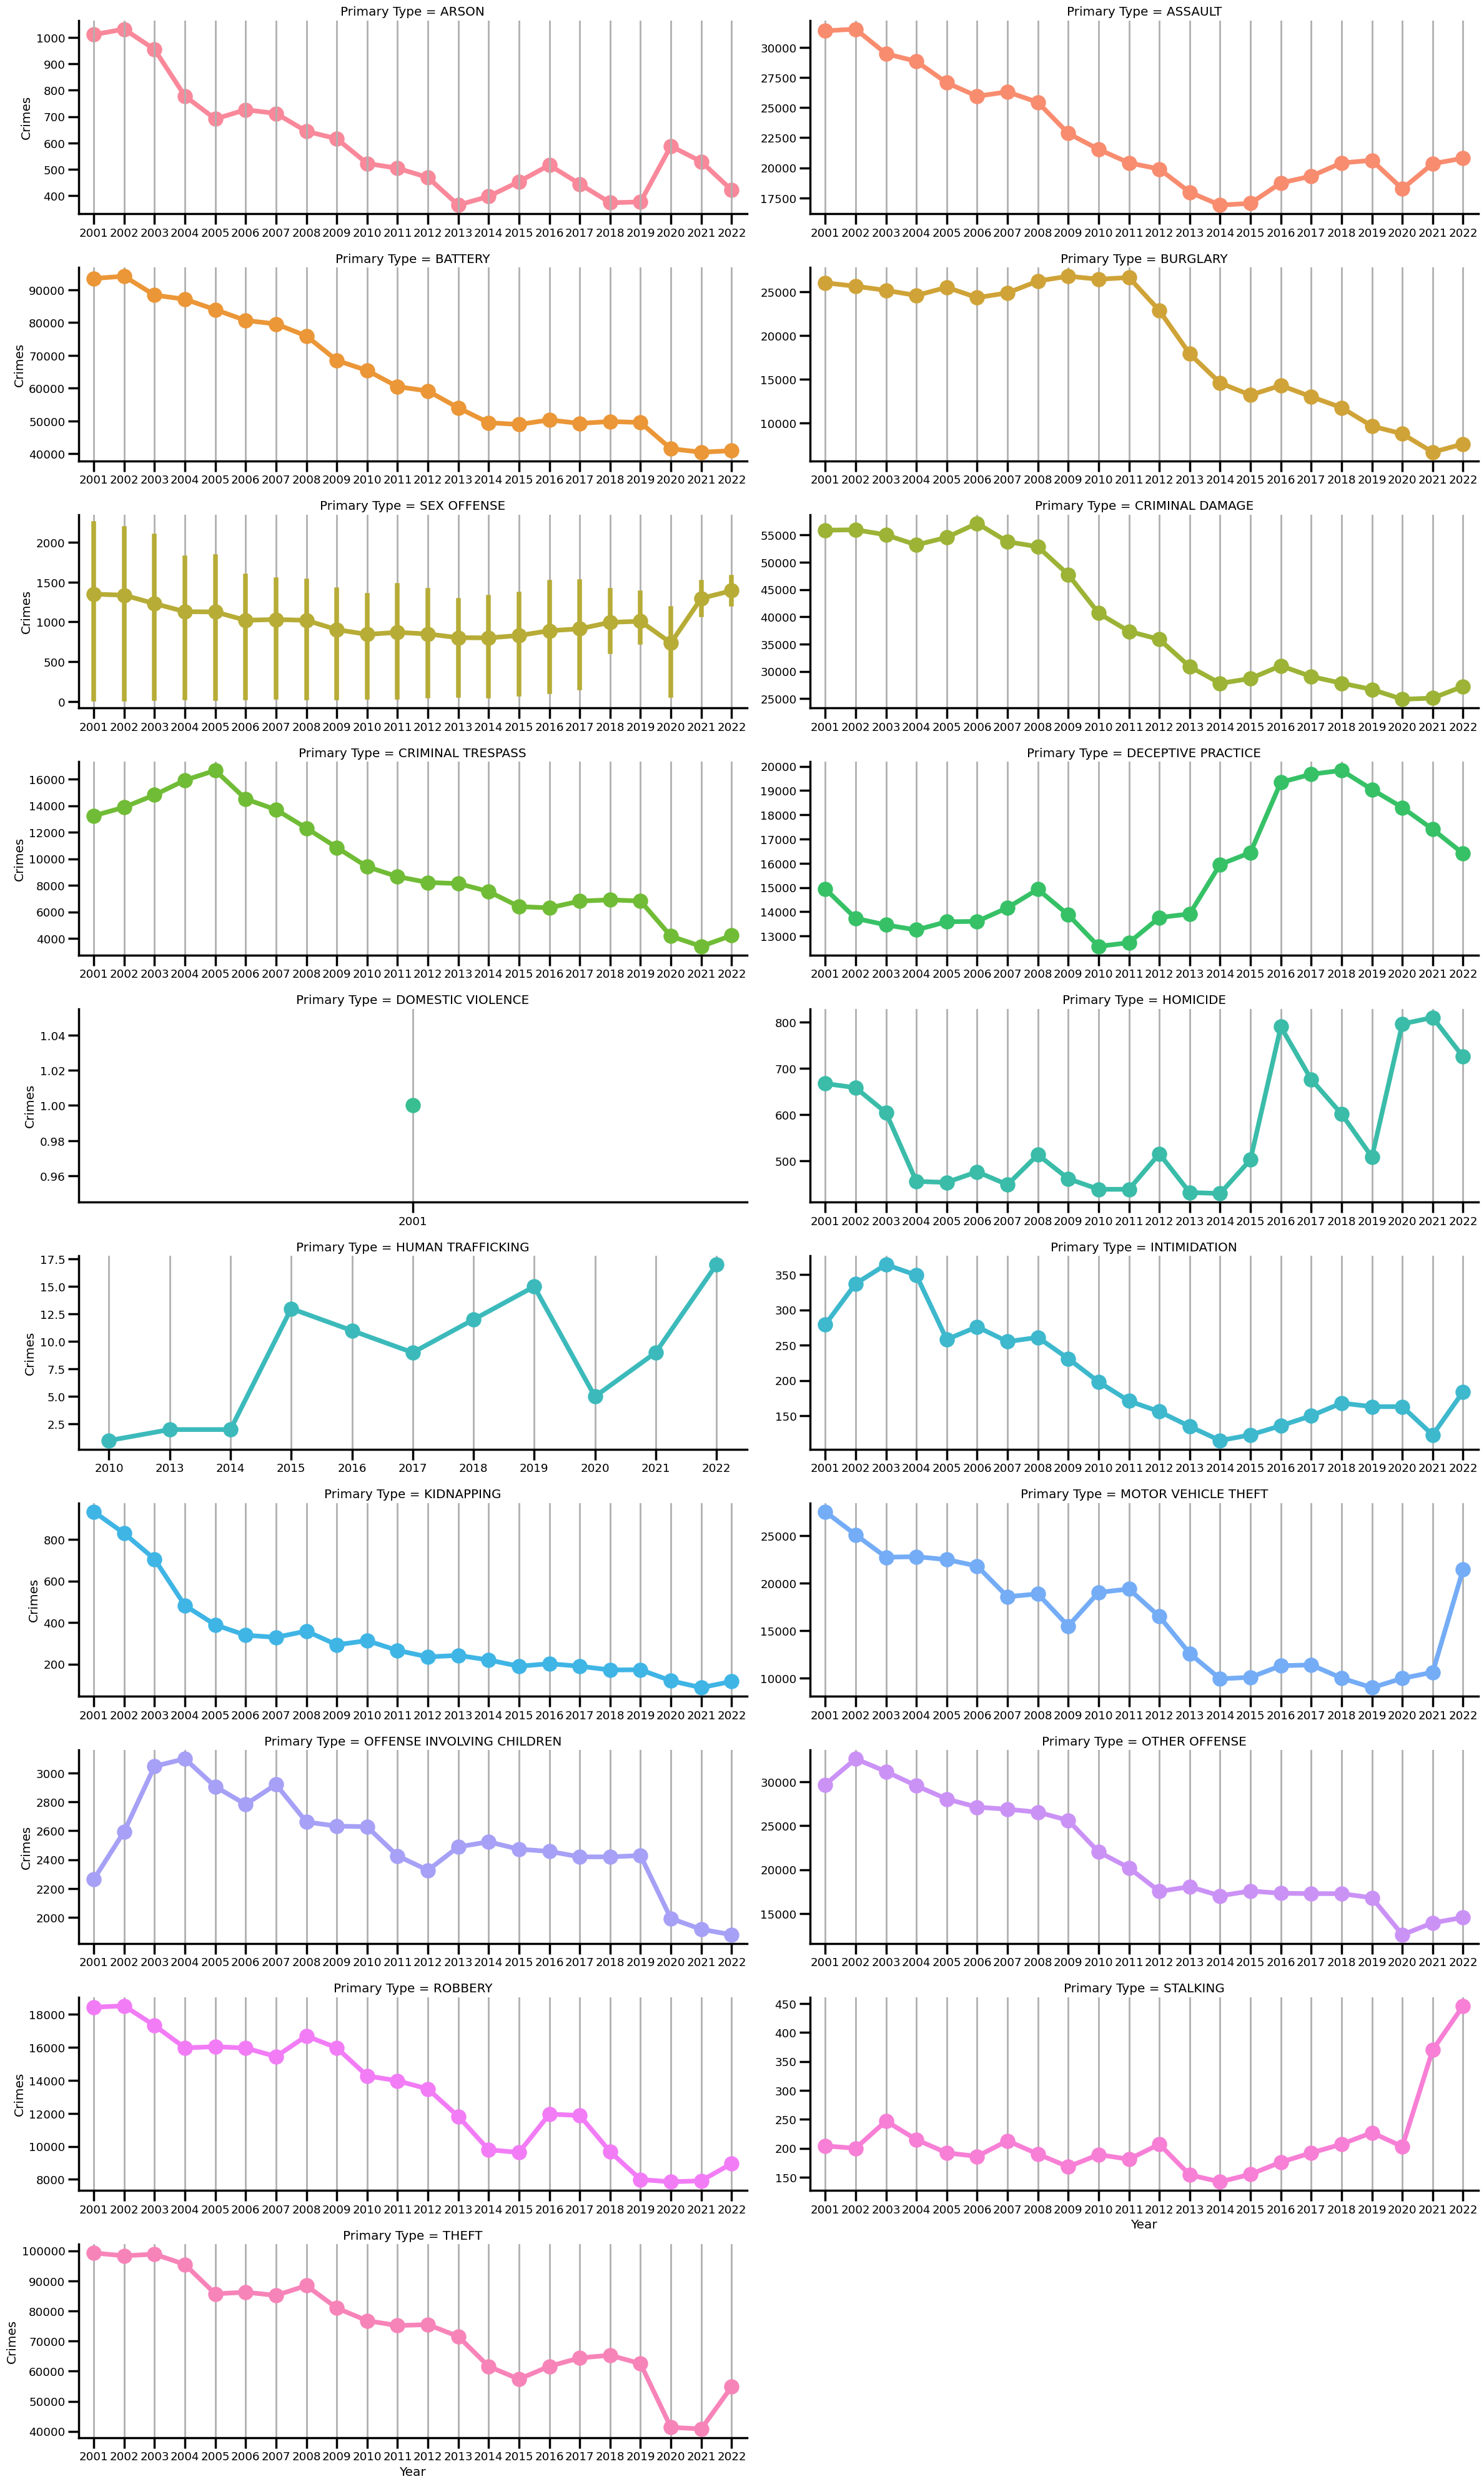

In [43]:
g = sns.catplot(data=plot_df_y, x='Year', y='Crimes',
                kind='point',aspect=3, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

###  Topic 2 part 2 Answer
-  We can see that *Human Trafficking*, *Stalking*, *Sex Offense*, and *Homicide* Each have gone against the greater, downward trend in Crime.